In [13]:
# Importantando bibliotecas
import subprocess
import time
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def medir_tempo_execucao(comando, repeticoes=10):
    tempos = []
    
    for _ in range(repeticoes):
        inicio = time.time()
        subprocess.run(comando, shell=True)
        fim = time.time()
        tempos.append(fim - inicio)
    
    media = np.mean(tempos)
    desvio = np.std(tempos)
    
    return media, desvio

In [15]:
!make

gcc -Wall -Wextra   -c -o graphic_functions.o graphic_functions.c
gcc graphic_functions.o pthreads_graphic.c -o pthreads_graphic.out -lGL -lGLEW -lglfw
gcc graphic_functions.o openmp_graphic.c -o openmp_graphic.out -lGL -lGLEW -lglfw -fopenmp
gcc  pthreads.c -o pthreads.out
gcc  openmp.c -o openmp.out -fopenmp
rm -f graphic_functions.o


generation 2000: 51
Tempo gasto: 189525.255000 milisegundos
generation 2000: 51
Tempo gasto: 186486.559000 milisegundos
generation 2000: 51
Tempo gasto: 186323.699000 milisegundos
generation 2000: 51
Tempo gasto: 187166.498000 milisegundos
generation 2000: 51
Tempo gasto: 188183.380000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 188105.604000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 187337.247000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 189195.975000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 190387.936000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 189987.423000 milisegundos
generation 2000: 51
Tempo gasto: 101237.532000 milisegundos
generation 2000: 51
Tempo gasto: 99052.514000 milisegundos
generation 2000: 51
Tempo gasto: 97635.948000 milisegundos
generation 2000: 51
Tempo gasto: 98513.310000 milisegundos
generation 2000: 51
Tempo gasto: 97639.210000 milisegundos
geração 2000:  51 vivos
Tempo gasto: 101133.299000 milisegundos
geração 2000:  51 vi

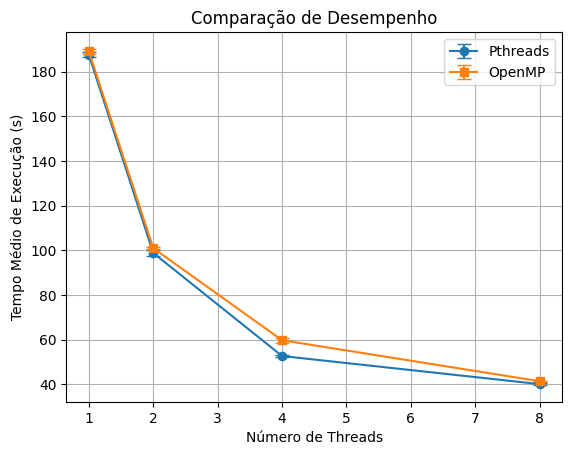

In [16]:
import time
import subprocess
import matplotlib.pyplot as plt

repeticoes = 5
tempos_pthreads = []
tempos_openmp = []
desvios_pthreads = []
desvios_openmp = []

threads_a_usar = [1,2,4, 8]

for num_threads in threads_a_usar:
    tempos_execucao_pthreads = []
    tempos_execucao_openmp = []
    
    # Coleta os tempos de execução para Pthreads
    for _ in range(repeticoes):
        start_time = time.time()
        subprocess.run(f"./pthreads.out {num_threads}", shell=True)
        end_time = time.time()
        tempos_execucao_pthreads.append(end_time - start_time)
    
    # Coleta os tempos de execução para OpenMP
    for _ in range(repeticoes):
        start_time = time.time()
        subprocess.run(f"./openmp.out {num_threads}", shell=True)
        end_time = time.time()
        tempos_execucao_openmp.append(end_time - start_time)
    
    # Salva os tempos em arquivos .txt
    nome_arquivo_pthreads = f"./tempos_pthreads/conjunto_num_thread_{num_threads}_pthreads.txt"
    with open(nome_arquivo_pthreads, 'w') as f:
        for tempo in tempos_execucao_pthreads:
            f.write(str(tempo) + '\n')
    
    nome_arquivo_openmp = f"./tempos_openmp/conjunto_num_thread_{num_threads}_openmp.txt"
    with open(nome_arquivo_openmp, 'w') as f:
        for tempo in tempos_execucao_openmp:
            f.write(str(tempo) + '\n')
    
    # Calcula médias e desvios
    media_pthreads = sum(tempos_execucao_pthreads) / repeticoes
    desvio_pthreads = (sum([(tempo - media_pthreads)**2 for tempo in tempos_execucao_pthreads]) / repeticoes)**0.5
    
    media_openmp = sum(tempos_execucao_openmp) / repeticoes
    desvio_openmp = (sum([(tempo - media_openmp)**2 for tempo in tempos_execucao_openmp]) / repeticoes)**0.5
    
    tempos_pthreads.append(media_pthreads)
    tempos_openmp.append(media_openmp)
    desvios_pthreads.append(desvio_pthreads)
    desvios_openmp.append(desvio_openmp)

# Plotagem
x = threads_a_usar
plt.errorbar(x, tempos_pthreads, yerr=desvios_pthreads, fmt='-o', label='Pthreads', capsize=5)
plt.errorbar(x, tempos_openmp, yerr=desvios_openmp, fmt='-s', label='OpenMP', capsize=5)

plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio de Execução (s)')
plt.title('Comparação de Desempenho')
plt.legend()
plt.grid(True)
plt.show()